# Introdução Inferência Estatística

O objetivo da Inferência Estatística é produzir afirmações sobre dada característica da população, na qual estamos interessados, a partir de informações
colhidas de uma parte dessa população. Ou seja, a Inferência Estatística tem por objetivo fazer generalizações sobre uma população com base nos dados de uma amostra

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## 1. População e Amostra

A população é o conjunto completo de elementos que queremos estudar, enquanto a amostra é um subconjunto selecionado dessa população

In [3]:
populacao = np.random.normal(loc=50, scale=15, size=10000) # população normal com média 50 e desvio 15
amostra = np.random.choice(populacao, size=100, replace=False) # amostra aleatória simples

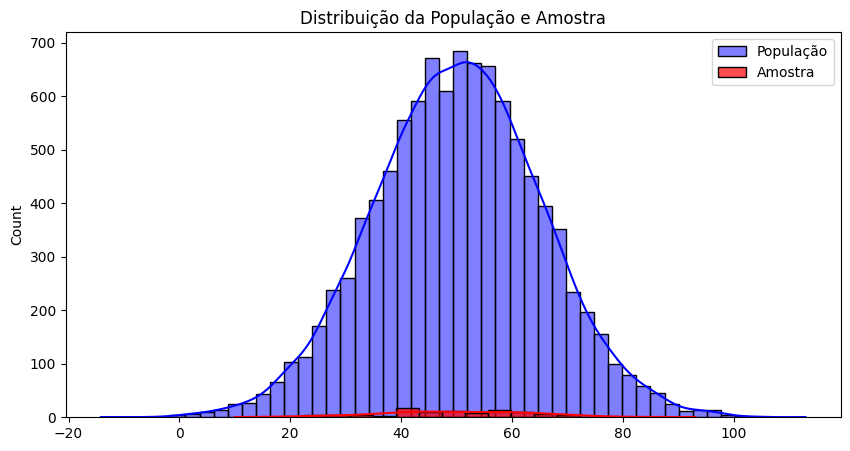

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(populacao, bins=50, kde=True, color='blue', label='População', alpha=0.5)
sns.histplot(amostra, bins=20, kde=True, color='red', label='Amostra', alpha=0.7)
plt.legend()
plt.title("Distribuição da População e Amostra")
plt.show()

## Estatísticas e Parâmetros

Estatísticas são medidas calculadas a partir de uma amostra, enquanto parâmetros são medidas da população inteira


In [5]:
# parametros
media_populacao = np.mean(populacao)
desvio_populacao = np.std(populacao)

# estatisticas
media_amostra = np.mean(amostra)
desvio_amostra = np.std(amostra)

In [6]:
print(f"Média População: {media_populacao:.2f}, Desvio Padrão População: {desvio_populacao:.2f}")
print(f"Média Amostra: {media_amostra:.2f}, Desvio Padrão Amostra: {desvio_amostra:.2f}")

Média População: 50.20, Desvio Padrão População: 15.14
Média Amostra: 50.21, Desvio Padrão Amostra: 14.32


## Distribuições Amostrais - Teorema do Limite Central

Quando extraímos várias amostras da população e calculamos suas médias, a distribuição dessas médias tende a seguir uma distribuição normal

In [9]:
num_amostras = 10000
tamanho_amostra = 50

medias_amostrais = [np.mean(np.random.choice(populacao, tamanho_amostra, replace=False)) for _ in range(num_amostras)]

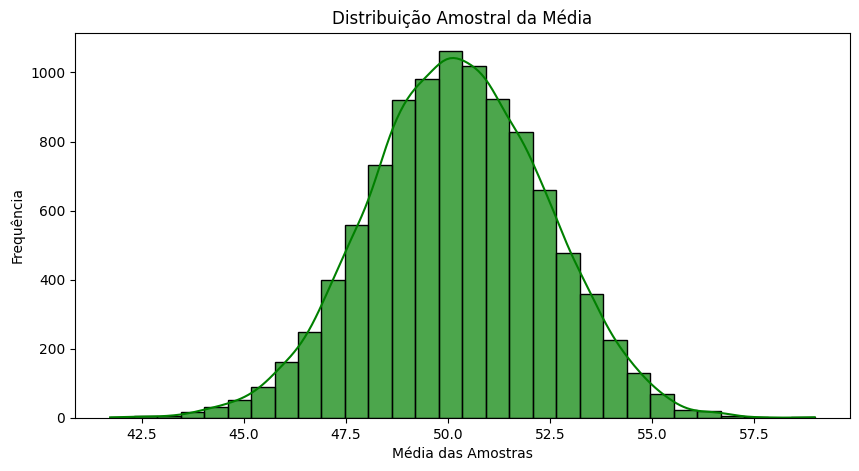

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(medias_amostrais, bins=30, kde=True, color='green', alpha=0.7)
plt.title("Distribuição Amostral da Média")
plt.xlabel("Média das Amostras")
plt.ylabel("Frequência")
plt.show()

## Distribuição Amostral de uma Proporção

A distribuição amostral de uma proporção mostra como os resultados podem variar se pegarmos várias amostras da população

In [11]:
populacao_binaria = np.random.choice([0, 1], size=10000, p=[0.4, 0.6])  # proporção verdadeira 60%
proporcoes_amostrais = [np.mean(np.random.choice(populacao_binaria, tamanho_amostra, replace=False)) for _ in range(num_amostras)]

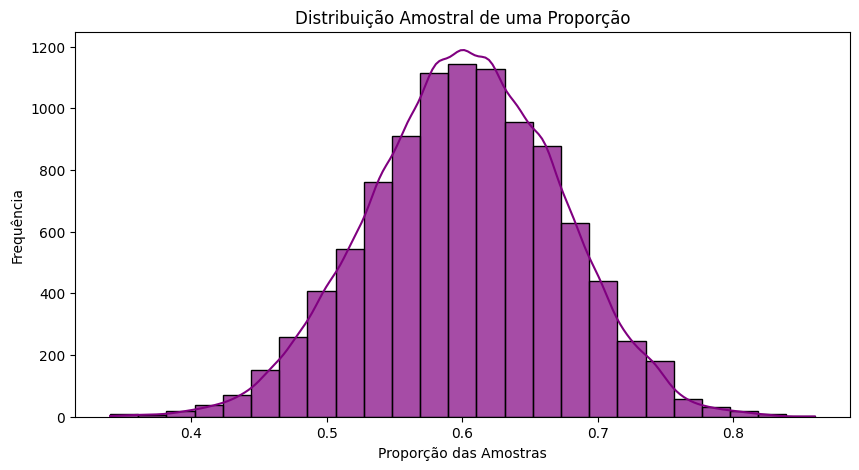

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(proporcoes_amostrais, bins=25, kde=True, color='purple', alpha=0.7)
plt.title("Distribuição Amostral de uma Proporção")
plt.xlabel("Proporção das Amostras")
plt.ylabel("Frequência")
plt.show()

## Determinação do Tamanho de uma Amostra

Para garantir resultados estatisticamente significativos, o tamanho da amostra deve ser determinado com base no tamanho do efeito esperado, nível de confiança e poder estatístico

In [14]:
from statsmodels.stats.power import TTestIndPower

# parâmetros
efet_size = 0.5  # tamanho do efeito médio
alpha = 0.05  # nível de significância
power = 0.8  # poder estatístico

In [15]:
# cálculo do tamanho da amostra
tamanho_necessario = TTestIndPower().solve_power(effect_size=efet_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Tamanho mínimo da amostra necessário: {np.ceil(tamanho_necessario)}")

Tamanho mínimo da amostra necessário: 64.0
